In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_excel("PyrenoidImageJAnalysis4.xlsx")
df.head()

,Unnamed: 0,CellArea,OuterP,InnerP,Strain,Condition,Pyrenoid Sheath Size,Gaps,Comment
0,CC_1009 6 Hours _#0.jpg,1812418.0,224154.0,46917.0,CC-1009,6 Hours Hyperoxia,0.097790,0.0,NaN
1,CC_2343 6 Hours_#0.jpg,2880607.0,398162.0,188621.0,CC-2343,6 Hours Hyperoxia,0.072742,3.0,NaN
2,MP1_1 6 hours_#0.jpg,1566280.0,170496.0,42900.0,c1_1,6 hours Hyperoxia,0.081464,0.0,NaN
3,MP1_2 6 hours_#0.jpg,1036073.0,251124.0,81890.0,c1_2,6 hours Hyperoxia,0.163342,0.0,NaN
4,MP1_3 6 hours #0.jpg,2644044.0,166692.0,130522.0,c1_3,6 hours Hyperoxia,0.013680,6.0,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'CellArea', 'OuterP', 'InnerP', 'Strain ', 'Condition ',
       'Pyrenoid Sheath Size', 'Gaps', 'Comment '],
      dtype='object')

In [4]:
all_strains = ["CC-1009", "CC-2343" ]

all_conditions = ['Control', 'Hydrogen Peroxide ']

all_colors = {
    ("CC-1009",'Control'):"darkblue",
    ("CC-1009",'Hydrogen Peroxide '):"lightblue",
    ("CC-2343",'Control'):"darkgreen",
    ("CC-2343",'Hydrogen Peroxide '):"lightgreen"
}

compare_groups = [
    [("CC-1009", "Control"), ("CC-1009", "Hydrogen Peroxide ")],
    [("CC-2343", "Control"), ("CC-2343", "Hydrogen Peroxide ")]
]

# saved figures will have a solid white background
plt.rcParams.update({
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)
})

<ipython-input-5-f4ab378750cb>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


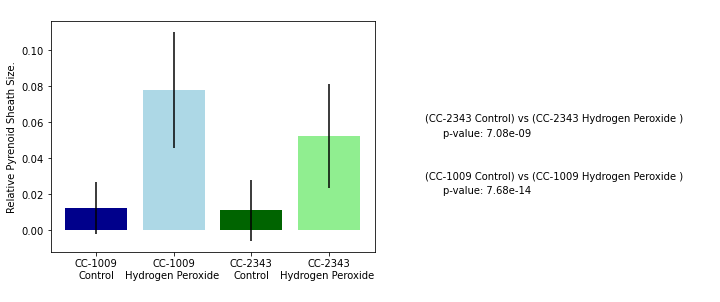

In [5]:
y_column = "Pyrenoid Sheath Size"

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([.08, .15, .45, .8])

all_x, all_x_labels = [],[]

values_by_group = {}

for x2,condition in enumerate(all_conditions):
    for x1,strain in enumerate(all_strains):
        values = df.loc[
            (df['Strain '] == strain) & 
            (df["Condition "] == condition),
            y_column].values
        values_by_group[strain,condition] = values
        y = np.nanmean(values)
        yerr = np.nanstd(values)

        x = x1*len(all_conditions)+x2
        all_x.append(x)
        all_x_labels.append("{0}\n{1}".format( strain, condition ))

        ax.bar(x, y, yerr=yerr, color=all_colors[strain,condition] )

ax.set_xticks(all_x)
ax.set_xticklabels(all_x_labels,rotation=0)
ax.set_ylabel("Relative Pyrenoid Sheath Size.")
#ax.legend(bbox_to_anchor=(1, 0.5))
fig.show()

#
ax = fig.add_axes([.5, 0, .5, 1])
ax.axis(False)
for i,group_pair in enumerate(compare_groups):
    (strain_a,cond_a) = group_pair[0]
    (strain_b,cond_b) = group_pair[1]
    a_vals = values_by_group[strain_a,cond_a]
    b_vals = values_by_group[strain_b,cond_b]
    _,pval = stats.ttest_ind( a_vals, b_vals, nan_policy="omit" )
    ax.text( .2,.4+i*.2,"({0} {1}) vs ({2} {3})".format( strain_a,cond_a,strain_b,cond_b ))
    ax.text( .25,.4+i*.2-.05,"p-value: {0:.2e}".format( pval ))

plt.savefig(y_column + ".png", dpi=300)